In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
df = pd.read_csv("../data/data_cleaned.csv", low_memory=False)
df.head()

,Runner ID,First Name,Surname,Nat.,Gender,Age,Age Group,Cat,YOB,Race Count,...,Cat. Rank,Finish Percentage,Performance Ratio,Distance/Time,Distance KM,Terrain,Time Seconds Finish,Distance Finish,Average Speed,Avg.Speed km/h
0,1354671,Allen,Boyce,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,1.0,0.1,1.000000,87km,87.0,road,23963.0,NaN,275.436782,13.070
1,1384818,Dermock,Parr,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,2.0,0.2,0.783335,87km,87.0,road,30591.0,NaN,351.620690,10.238
2,1384846,Gordon,Morrison,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,3.0,0.3,0.746023,87km,87.0,road,32121.0,NaN,369.206897,9.751
3,1384834,Max,Trimborn,RSA,M,NaN,Unknown,Unknown,NaN,0.0,...,4.0,0.4,0.734881,87km,87.0,road,32608.0,NaN,374.804598,9.605
4,1384824,Edgar,Marie,RSA,M,53.0,50-59,M50,1887.0,0.0,...,1.0,0.5,0.731315,87km,87.0,road,32767.0,NaN,376.632184,9.558


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')

In [10]:
df.columns

Index(['Runner ID', 'First Name', 'Surname', 'Nat.', 'Gender', 'Age',
       'Age Group', 'Cat', 'YOB', 'Race Count', 'Cumulative Distance KM',
       'Event ID', 'Event', 'Event Type', 'Date', 'Race Location',
       'Elevation Gain', 'Elevation Gain per KM', 'Total Finishers',
       'Male Finishers', 'Female Finishers', 'Time Seconds Winner',
       'Distance Winner', 'Rank', 'Rank M/F', 'Cat. Rank', 'Finish Percentage',
       'Performance Ratio', 'Distance/Time', 'Distance KM', 'Terrain',
       'Time Seconds Finish', 'Distance Finish', 'Average Speed',
       'Avg.Speed km/h', 'Year'],
      dtype='object')

### Historic analysis

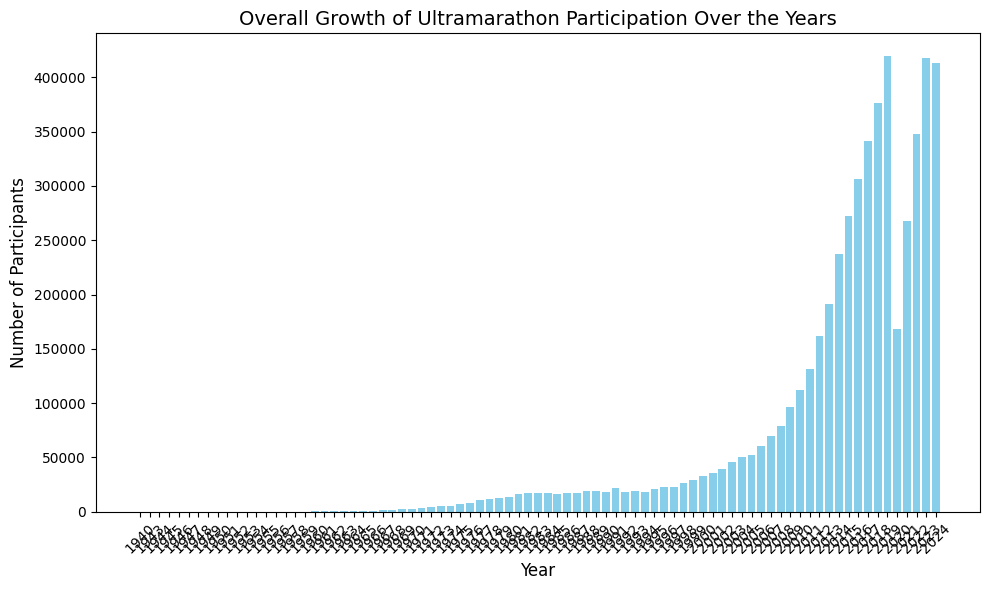

In [9]:
import matplotlib.pyplot as plt

# 3. Overall Growth of Participation Over Time

# Group by year and count unique runner IDs (or simply count rows if each row = one runner)
yearly_counts = df.groupby('Year')['Runner ID'].nunique().reset_index(name='Total_Participants')

# Plot overall participation growth
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts['Year'], yearly_counts['Total_Participants'], color='skyblue')
plt.title('Overall Growth of Ultramarathon Participation Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

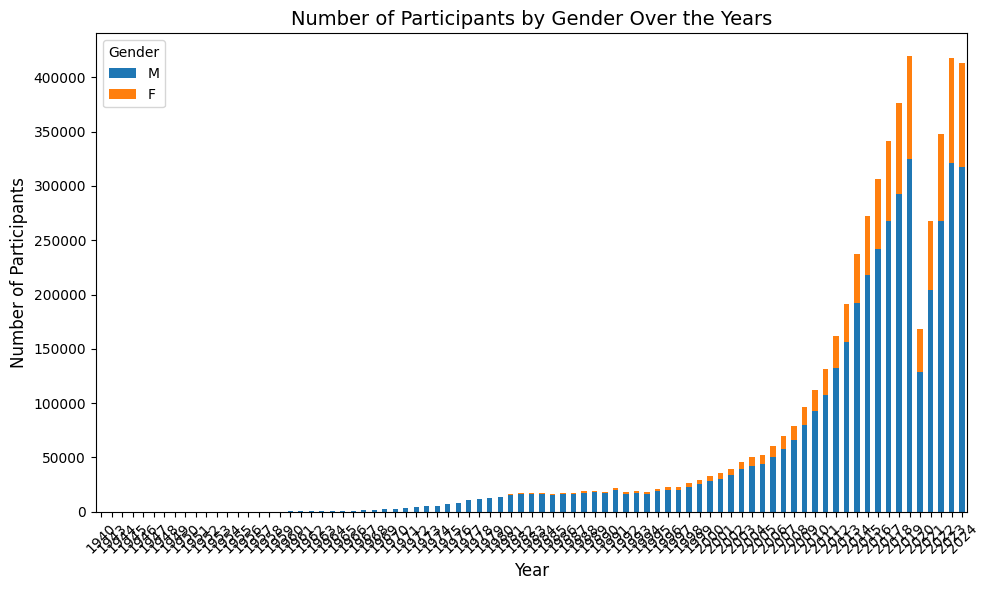

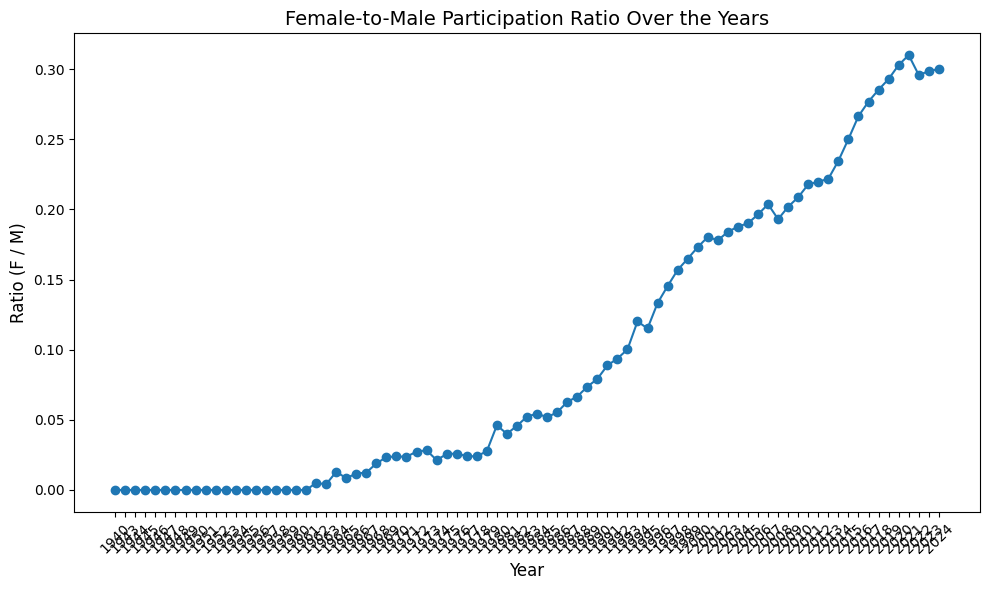

In [11]:
# ------------------------------------------------------------------------------
# 4. Gender Ratio Over Time

# Group by both Year and Gender, then count unique runners
gender_counts = df.groupby(['Year', 'Gender'])['Runner ID'].nunique().reset_index(name='Count')

# Pivot the data so that each Year is a row, and each Gender is a column
gender_pivot = gender_counts.pivot(index='Year', columns='Gender', values='Count').fillna(0)

# If you have only 'M' and 'F', create a ratio column
if 'M' in gender_pivot.columns and 'F' in gender_pivot.columns:
    gender_pivot['Female_to_Male_Ratio'] = gender_pivot['F'] / gender_pivot['M']

# Plot a stacked bar chart of male vs. female participants by year
gender_pivot[['M', 'F']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Participants by Gender Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# If you want to visualize the female-to-male ratio over time
if 'Female_to_Male_Ratio' in gender_pivot.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(gender_pivot.index, gender_pivot['Female_to_Male_Ratio'], marker='o', linestyle='-')
    plt.title('Female-to-Male Participation Ratio Over the Years', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Ratio (F / M)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [12]:
# 5. Identify Key Participation Surges or Dips

# You might look at the year-over-year change in total participants
yearly_counts['YoY_Change'] = yearly_counts['Total_Participants'].diff()

# Find the largest increases or decreases
top_5_increases = yearly_counts.nlargest(5, 'YoY_Change')
top_5_decreases = yearly_counts.nsmallest(5, 'YoY_Change')

print("Top 5 biggest year-over-year participation increases:")
print(top_5_increases)

print("\nTop 5 biggest year-over-year participation decreases:")
print(top_5_decreases)

Top 5 biggest year-over-year participation increases:
    Year  Total_Participants  YoY_Change
79  2021              267952     99720.0
80  2022              347531     79579.0
81  2023              417627     70096.0
72  2014              237290     45901.0
77  2019              419579     43285.0

Top 5 biggest year-over-year participation decreases:
    Year  Total_Participants  YoY_Change
78  2020              168232   -251347.0
82  2024              412939     -4688.0
50  1992               18096     -3501.0
43  1985               16222     -1117.0
48  1990               18513      -499.0
